/var/folders/rq/vks10_qx2l9b08d_pygvwfzh0000gn/T/ipykernel_73851/3606069770.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pmip4 = pmip4.append({'Model': 'cGENIE', 'Ocean Mean': -4.603}, ignore_index=True)
/var/folders/rq/vks10_qx2l9b08d_pygvwfzh0000gn/T/ipykernel_73851/3606069770.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pmip4 = pmip4.append({'Model': 'Tierney (2020)', 'Ocean Mean': -2.95, 'Ocean Std': 0.55}, ignore_index=True)


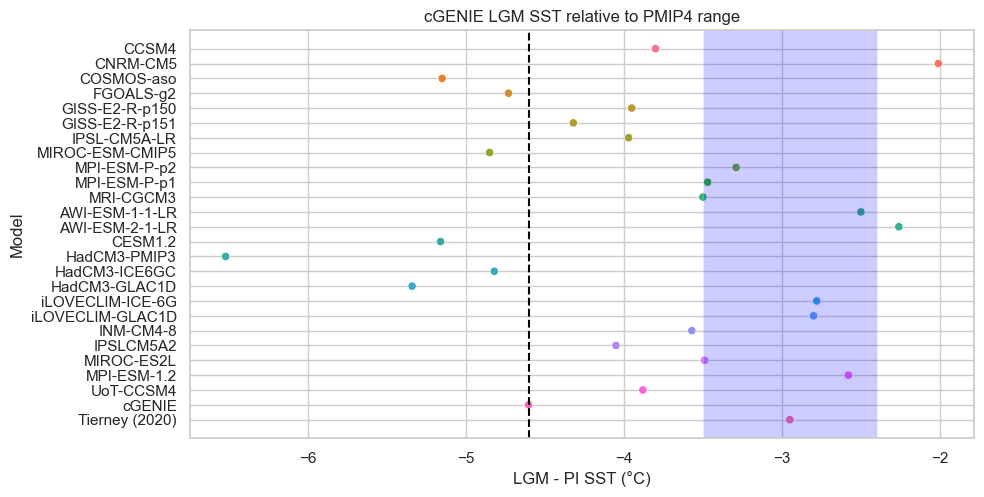

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the PMIP4 data from CSV
## Kageyama et al. (2021) Climate of the Past
pmip4 = pd.read_csv("../data/PMIP_MAT.csv")

# Add cGENIE result into PMIP4 dataset
pmip4 = pmip4.append({'Model': 'cGENIE', 'Ocean Mean': -4.603}, ignore_index=True)
pmip4 = pmip4.append({'Model': 'Tierney (2020)', 'Ocean Mean': -2.95, 'Ocean Std': 0.55}, ignore_index=True)

# Calculate Tierney Data range
tierney_range = pmip4[pmip4['Model'] == 'Tierney (2020)']['Ocean Std'].values[0] * 2

# Create the scatter plot with color assigned to model
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Ocean Mean", y="Model", hue="Model", data=pmip4)
plt.axvline(x=pmip4[pmip4['Model'] == 'cGENIE']['Ocean Mean'].values[0], linestyle='--', color='black', label='cGENIE')
plt.axvspan(pmip4[pmip4['Model'] == 'Tierney (2020)']['Ocean Mean'].values[0] - tierney_range / 2, pmip4[pmip4['Model'] == 'Tierney (2020)']['Ocean Mean'].values[0] + tierney_range / 2, facecolor='blue', alpha=0.2, label='Tierney (2020) Range')
plt.xlabel('LGM - PI SST (°C)')
plt.ylabel('Model')
plt.title('cGENIE LGM SST relative to PMIP4 range')
plt.tight_layout()

# Remove the legend
plt.legend().remove()

# Save the figure
plt.savefig('../output/pmip4_ocean_mean.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
